In [1]:
# import relevant packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy.stats as stats

In [2]:
# climate model data:
clim_path = '/glade/campaign/cgd/ppc/eperkins/cesm/'  # change to your path
clim_file = 'cesmLE_B1850C5CN_H2OSNO_1900_2099_1D_MRBplus.nc'   # change to your file
clim_data = xr.open_dataarray(clim_path+clim_file)

In [3]:
clim_data['time'] = clim_data.indexes['time'].to_datetimeindex()

/glade/work/eperkins/miniconda3/envs/analysis3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  """Entry point for launching an IPython kernel.


In [4]:
test_data = clim_data.isel(time=0)

Text(0.5, 1.0, 'Snow Depth for January 2, 1900 as predicted by CESMLE')

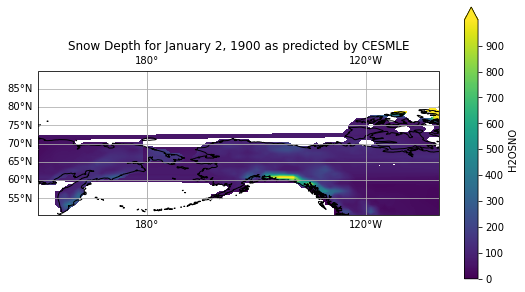

In [5]:
cmap1 = plt.cm.viridis
lev1 = np.arange(0,1000,1)
new_lon = np.zeros(len(test_data.lon))
for i in range(0, len(test_data.lon)):
    if test_data.lon[i] < 0:
        new_lon[i] = test_data.lon[i] % 180
    else:
        new_lon[i] = test_data.lon[i] - 180
test_data['lon'] = new_lon
cm = 180
proj = ccrs.PlateCarree(central_longitude=cm)
fig = plt.figure(figsize = [9,5])
ax1 = fig.add_subplot(1, 1, 1, projection=proj)
test_data.plot.contourf(ax=ax1, cmap=cmap1, levels=lev1)
ax1.coastlines()
ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
plt.title('Snow Depth for January 2, 1900 as predicted by CESMLE')

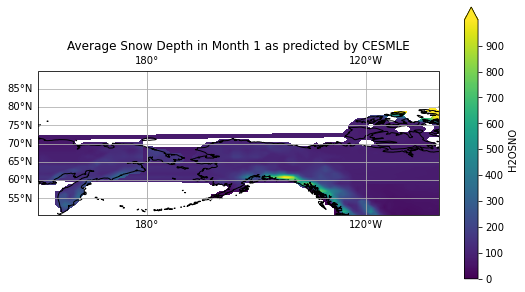

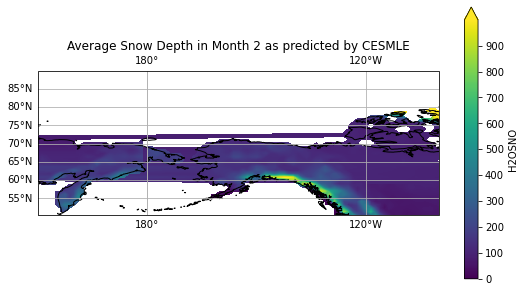

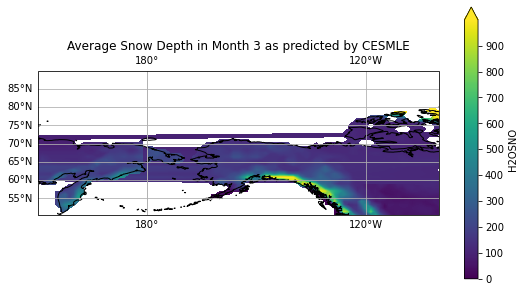

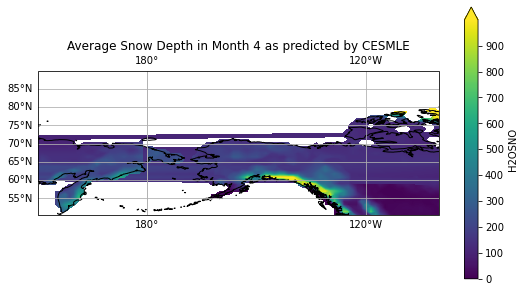

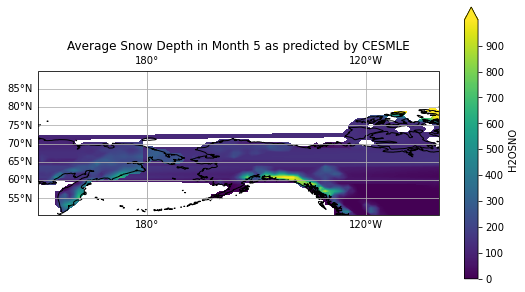

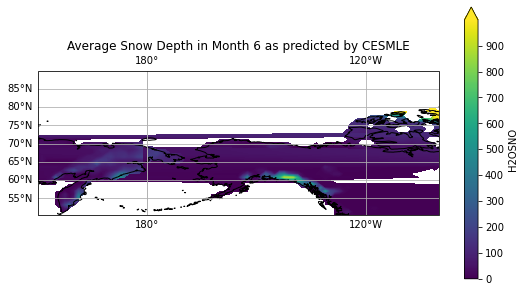

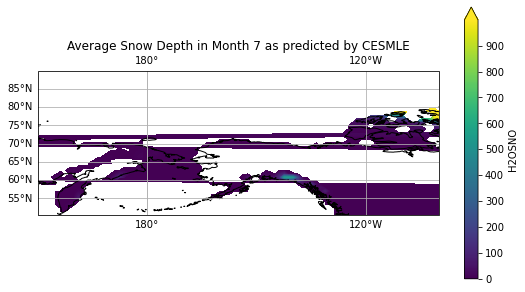

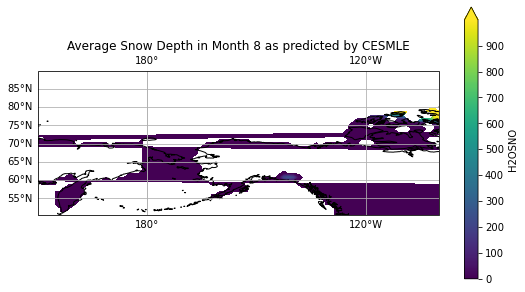

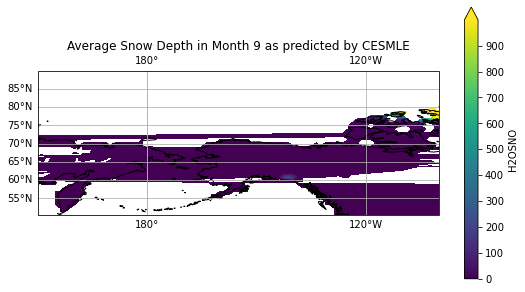

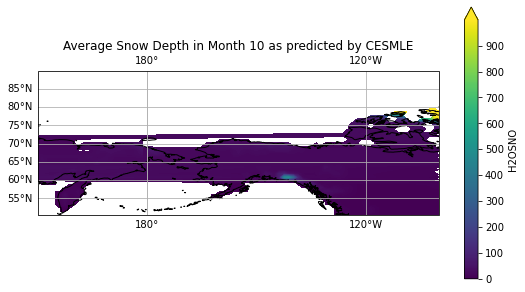

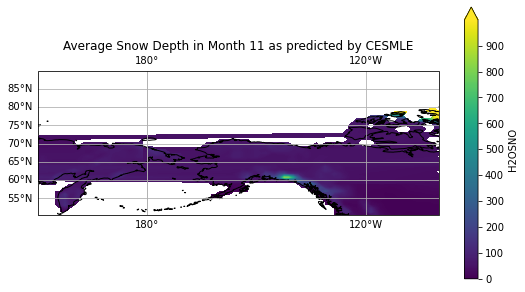

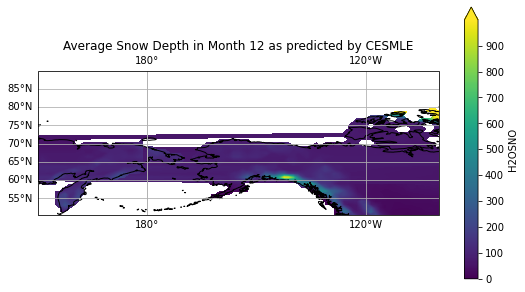

In [6]:
cmap1 = plt.cm.viridis
lev1 = np.arange(0,1000,1)
months_list = np.arange(1, 13, 1)
for i in months_list:
    month_name = str(i)
    month = np.where(clim_data['time'].dt.month == i)[0]
    month_avg = clim_data.isel(time=month).mean(dim='time')
    new_lon = np.zeros(len(month_avg.lon))
    for i in range(0, len(month_avg.lon)):
        if month_avg.lon[i] < 0:
            new_lon[i] = month_avg.lon[i] % 180
        else:
            new_lon[i] = month_avg.lon[i] - 180
    month_avg['lon'] = new_lon
    cm = 180
    proj = ccrs.PlateCarree(central_longitude=cm)
    fig = plt.figure(figsize = [9,5])
    ax1 = fig.add_subplot(1, 1, 1, projection=proj)
    month_avg.plot.contourf(ax=ax1, cmap=cmap1, levels=lev1)
    ax1.coastlines()
    ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
    plt.title('Average Snow Depth in Month '+month_name+' as predicted by CESMLE')